In [3]:
import torch
import numpy as np

class GridWorld:
    def __init__(self, grid_size=5, num_obstacles=5):
        self.grid_size = grid_size
        self.num_obstacles = num_obstacles
        self.reset()

    def reset(self):
        self.agent_position = torch.tensor([0, 0], dtype=torch.float32)
        self.goal_position = torch.tensor([self.grid_size - 1, self.grid_size - 1], dtype=torch.float32)
        self.obstacle_positions = {(torch.randint(0, self.grid_size, (1,)).item(), torch.randint(0, self.grid_size, (1,)).item()) for _ in range(self.num_obstacles)}
        self.done = False

    def step(self, action):
        if self.done:
            raise ValueError("Episode has ended, please call reset() to restart.")

        if action == 0:  # Move right
            next_position = (self.agent_position[0], min(self.grid_size - 1, self.agent_position[1] + 1))
        elif action == 1:  # Move left
            next_position = (self.agent_position[0], max(0, self.agent_position[1] - 1))
        elif action == 2:  # Move down
            next_position = (min(self.grid_size - 1, self.agent_position[0] + 1), self.agent_position[1])
        elif action == 3:  # Move up
            next_position = (max(0, self.agent_position[0] - 1), self.agent_position[1])
        else:
            raise ValueError("Invalid action.")

        next_position = torch.tensor(next_position)

        if next_position.tolist() in [tuple(pos) for pos in self.obstacle_positions]:
            reward = torch.tensor(-1, dtype=torch.float32)
        elif torch.all(next_position == self.goal_position):
            reward = torch.tensor(1, dtype=torch.float32)
            self.done = True
        else:
            reward = torch.tensor(0, dtype=torch.float32)

        self.agent_position = next_position

        return self.agent_position, reward, self.done

    def render(self):
        grid = torch.zeros((self.grid_size, self.grid_size))
        agent_row, agent_col = self.agent_position.long().tolist()  # Convert to integers
        grid[agent_row, agent_col] = 0.5  # Agent position
        goal_row, goal_col = self.goal_position.long().tolist()  # Convert to integers
        grid[goal_row, goal_col] = 0.8  # Goal position
        for obstacle_pos in self.obstacle_positions:
            obstacle_row, obstacle_col = obstacle_pos
            grid[obstacle_row, obstacle_col] = 0.2  # Obstacle position
        return grid


Epoch: 0, Action: 1, State: tensor([0., 0.]), Reward: 0.0
tensor([[0.5000, 0.0000, 0.0000, 0.0000, 0.2000],
        [0.2000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.2000, 0.2000, 0.0000],
        [0.0000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.8000]])
Epoch: 0, Action: 3, State: tensor([0., 0.]), Reward: 0.0
tensor([[0.5000, 0.0000, 0.0000, 0.0000, 0.2000],
        [0.2000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.2000, 0.2000, 0.0000],
        [0.0000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.8000]])
Epoch: 0, Action: 2, State: tensor([1., 0.]), Reward: 0.0
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.2000],
        [0.2000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.2000, 0.2000, 0.0000],
        [0.0000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.8000]])
Epoch: 0, Action: 3, State: tensor([0., 0.]), Reward: 0.0
tensor([[0.5000

Epoch: 0, Action: 0, State: tensor([0., 1.]), Reward: 0.0
tensor([[0.2000, 0.5000, 0.0000, 0.0000, 0.2000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.2000, 0.0000, 0.2000]])
Epoch: 0, Action: 0, State: tensor([0., 2.]), Reward: 0.0
tensor([[0.2000, 0.0000, 0.5000, 0.0000, 0.2000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.2000, 0.0000, 0.2000]])
Epoch: 0, Action: 1, State: tensor([0., 1.]), Reward: 0.0
tensor([[0.2000, 0.5000, 0.0000, 0.0000, 0.2000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.2000, 0.0000, 0.2000]])
Epoch: 0, Action: 2, State: tensor([1., 1.]), Reward: 0.0
tensor([[0.2000

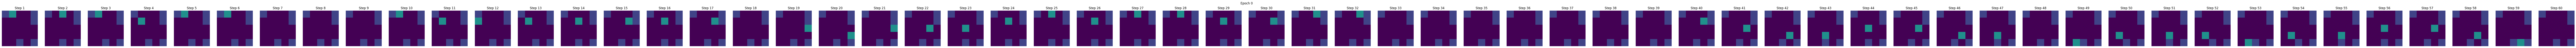

Epoch: 1, Action: 0, State: tensor([0., 1.]), Reward: 0.0
tensor([[0.0000, 0.5000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.0000, 0.0000, 0.8000]])
Epoch: 1, Action: 2, State: tensor([1., 1.]), Reward: 0.0
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.0000, 0.0000, 0.8000]])
Epoch: 1, Action: 1, State: tensor([1., 0.]), Reward: 0.0
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.0000, 0.0000, 0.8000]])
Epoch: 1, Action: 0, State: tensor([1., 1.]), Reward: 0.0
tensor([[0.0000

ValueError: Image size of 114000x300 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 114000x300 with 380 Axes>

Epoch: 2, Action: 3, State: tensor([0., 0.]), Reward: 0.0
tensor([[0.2000, 0.0000, 0.2000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 0.0000, 0.0000, 0.8000]])
Epoch: 2, Action: 3, State: tensor([0., 0.]), Reward: 0.0
tensor([[0.2000, 0.0000, 0.2000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 0.0000, 0.0000, 0.8000]])
Epoch: 2, Action: 2, State: tensor([1., 0.]), Reward: 0.0
tensor([[0.2000, 0.0000, 0.2000, 0.0000, 0.0000],
        [0.5000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 0.0000, 0.0000, 0.8000]])
Epoch: 2, Action: 0, State: tensor([1., 1.]), Reward: 0.0
tensor([[0.2000

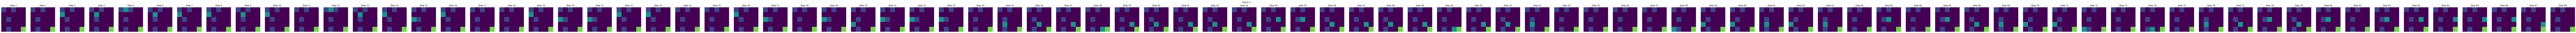

Epoch: 3, Action: 0, State: tensor([0., 1.]), Reward: 0.0
tensor([[0.0000, 0.5000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.0000, 0.0000, 0.0000, 0.2000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2000]])
Epoch: 3, Action: 0, State: tensor([0., 2.]), Reward: 0.0
tensor([[0.0000, 0.0000, 0.5000, 0.0000, 0.0000],
        [0.0000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.0000, 0.0000, 0.0000, 0.2000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2000]])
Epoch: 3, Action: 0, State: tensor([0., 3.]), Reward: 0.0
tensor([[0.0000, 0.0000, 0.0000, 0.5000, 0.0000],
        [0.0000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.0000, 0.0000, 0.0000, 0.2000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2000]])
Epoch: 3, Action: 0, State: tensor([0., 4.]), Reward: 0.0
tensor([[0.0000

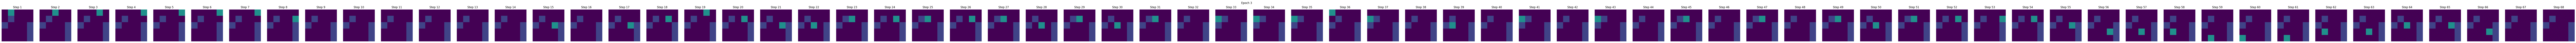

Epoch: 4, Action: 3, State: tensor([0., 0.]), Reward: 0.0
tensor([[0.5000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.8000]])
Epoch: 4, Action: 2, State: tensor([1., 0.]), Reward: 0.0
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.8000]])
Epoch: 4, Action: 1, State: tensor([1., 0.]), Reward: 0.0
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.8000]])
Epoch: 4, Action: 3, State: tensor([0., 0.]), Reward: 0.0
tensor([[0.5000

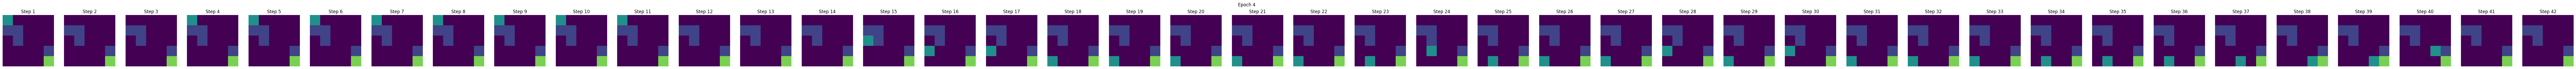

Epoch: 5, Action: 0, State: tensor([0., 1.]), Reward: 0.0
tensor([[0.2000, 0.5000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.2000, 0.2000],
        [0.0000, 0.2000, 0.0000, 0.0000, 0.2000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.8000]])
Epoch: 5, Action: 1, State: tensor([0., 0.]), Reward: 0.0
tensor([[0.2000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.2000, 0.2000],
        [0.0000, 0.2000, 0.0000, 0.0000, 0.2000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.8000]])
Epoch: 5, Action: 3, State: tensor([0., 0.]), Reward: 0.0
tensor([[0.2000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.2000, 0.2000],
        [0.0000, 0.2000, 0.0000, 0.0000, 0.2000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.8000]])
Epoch: 5, Action: 2, State: tensor([1., 0.]), Reward: 0.0
tensor([[0.2000

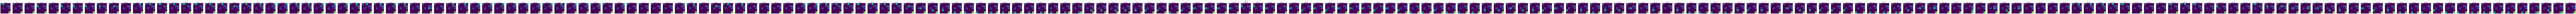

Epoch: 6, Action: 2, State: tensor([1., 0.]), Reward: 0.0
tensor([[0.2000, 0.2000, 0.2000, 0.0000, 0.0000],
        [0.5000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.8000]])
Epoch: 6, Action: 1, State: tensor([1., 0.]), Reward: 0.0
tensor([[0.2000, 0.2000, 0.2000, 0.0000, 0.0000],
        [0.5000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.8000]])
Epoch: 6, Action: 1, State: tensor([1., 0.]), Reward: 0.0
tensor([[0.2000, 0.2000, 0.2000, 0.0000, 0.0000],
        [0.5000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.8000]])
Epoch: 6, Action: 3, State: tensor([0., 0.]), Reward: 0.0
tensor([[0.2000

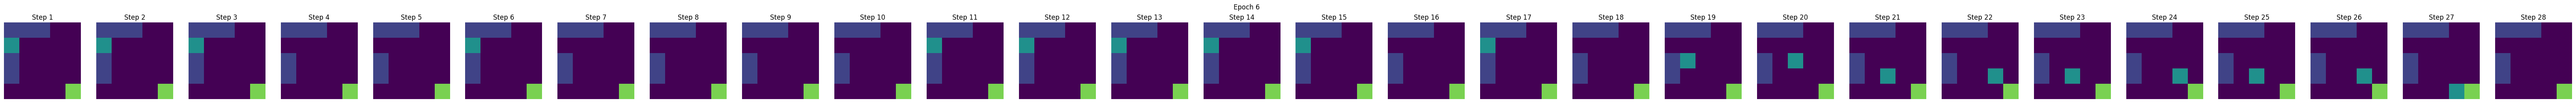

Epoch: 7, Action: 1, State: tensor([0., 0.]), Reward: 0.0
tensor([[0.5000, 0.0000, 0.0000, 0.2000, 0.0000],
        [0.2000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.2000, 0.0000, 0.2000],
        [0.2000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.8000]])
Epoch: 7, Action: 1, State: tensor([0., 0.]), Reward: 0.0
tensor([[0.5000, 0.0000, 0.0000, 0.2000, 0.0000],
        [0.2000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.2000, 0.0000, 0.2000],
        [0.2000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.8000]])
Epoch: 7, Action: 1, State: tensor([0., 0.]), Reward: 0.0
tensor([[0.5000, 0.0000, 0.0000, 0.2000, 0.0000],
        [0.2000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.2000, 0.0000, 0.2000],
        [0.2000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.8000]])
Epoch: 7, Action: 3, State: tensor([0., 0.]), Reward: 0.0
tensor([[0.5000

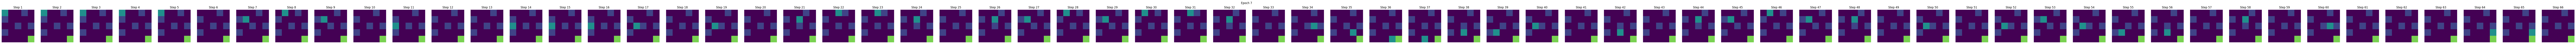

Epoch: 8, Action: 1, State: tensor([0., 0.]), Reward: 0.0
tensor([[0.2000, 0.0000, 0.0000, 0.2000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.8000]])
Epoch: 8, Action: 3, State: tensor([0., 0.]), Reward: 0.0
tensor([[0.2000, 0.0000, 0.0000, 0.2000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.8000]])
Epoch: 8, Action: 3, State: tensor([0., 0.]), Reward: 0.0
tensor([[0.2000, 0.0000, 0.0000, 0.2000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.8000]])
Epoch: 8, Action: 2, State: tensor([1., 0.]), Reward: 0.0
tensor([[0.2000

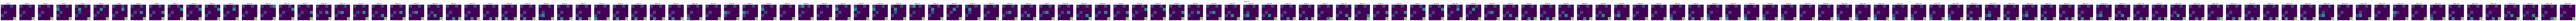

Epoch: 9, Action: 2, State: tensor([1., 0.]), Reward: 0.0
tensor([[0.2000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.0000, 0.0000, 0.2000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.2000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.2000, 0.2000]])
Epoch: 9, Action: 3, State: tensor([0., 0.]), Reward: 0.0
tensor([[0.2000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.2000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.2000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.2000, 0.2000]])
Epoch: 9, Action: 2, State: tensor([1., 0.]), Reward: 0.0
tensor([[0.2000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.0000, 0.0000, 0.2000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.2000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.2000, 0.2000]])
Epoch: 9, Action: 1, State: tensor([1., 0.]), Reward: 0.0
tensor([[0.2000

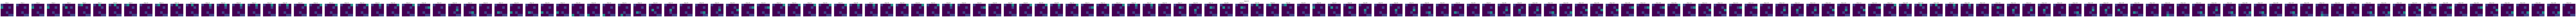

In [4]:
import matplotlib.pyplot as plt

# Training loop
env = GridWorld(grid_size=5, num_obstacles=5)
num_epochs = 10

for epoch in range(num_epochs):
    env.reset()
    done = False
    grids = []  # Store rendered grids for visualization
    while not done:
        action = np.random.randint(0, 4)
        state, reward, done = env.step(action)
        grid = env.render()
        grids.append(grid.numpy())  # Convert tensor to numpy array for plotting
        print(f"Epoch: {epoch}, Action: {action}, State: {state}, Reward: {reward}")
        print(grid)

    # Plot the grids for this epoch
    fig, axs = plt.subplots(1, len(grids), figsize=(len(grids) * 3, 3))
    for i, grid in enumerate(grids):
        axs[i].imshow(grid, cmap='viridis', origin='upper', vmin=0, vmax=1)
        axs[i].set_title(f"Step {i + 1}")
        axs[i].axis('off')
    plt.suptitle(f"Epoch {epoch}")
    plt.show()